In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../../input/data/train/train_ratings.csv') # 전체 학습 데이터 # git repo기준
train_df.head(3)

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539


# 영화를 본 개월 수

In [3]:
train_users = train_df['user'].unique()
time_period_df=train_df
year=list()
month=list()
day=list()
for t in time_period_df['time']:
    y,m,d= map(int,time.strftime('%Y-%m-%d', time.localtime(t)).split('-'))
    year.append(y)
    month.append(m)
    day.append(d)

In [4]:
time_period_df['year']=year
time_period_df['month']=month
time_period_df['day']=day
time_period_df.head(3)

,user,item,time,year,month,day
0,11,4643,1230782529,2009,1,1
1,11,170,1230782534,2009,1,1
2,11,531,1230782539,2009,1,1


In [6]:
user=pd.DataFrame(data=train_users, columns=['user'])
user.head(2)

,user
0,11
1,14


In [7]:
period_year=[]
period_month=[]
period_day=[]
for u in user['user']: # 4m 소요
    u_df=time_period_df[time_period_df['user']==u].sort_values(by=['time'])
    year= u_df.iloc[-1,3] - u_df.iloc[0,3] 
    month= u_df.iloc[-1,4] - u_df.iloc[0,4]
    day= u_df.iloc[-1,5] - u_df.iloc[0,5]
    if month<0:
        month+=12
    period_year.append(year)
    period_month.append(month)
    period_day.append(day)

In [8]:
user['period_year']=period_year
user['period_month']=period_month
user['period_day']=period_day
user.head(3)

,user,period_year,period_month,period_day
0,11,2,0,11
1,14,0,0,0
2,18,3,10,-18


In [9]:
user['period']=user['period_year']*12+period_month
user.head(3)

,user,period_year,period_month,period_day,period
0,11,2,0,11,24
1,14,0,0,0,0
2,18,3,10,-18,46


Text(0.5, 1.0, 'Total monthes')

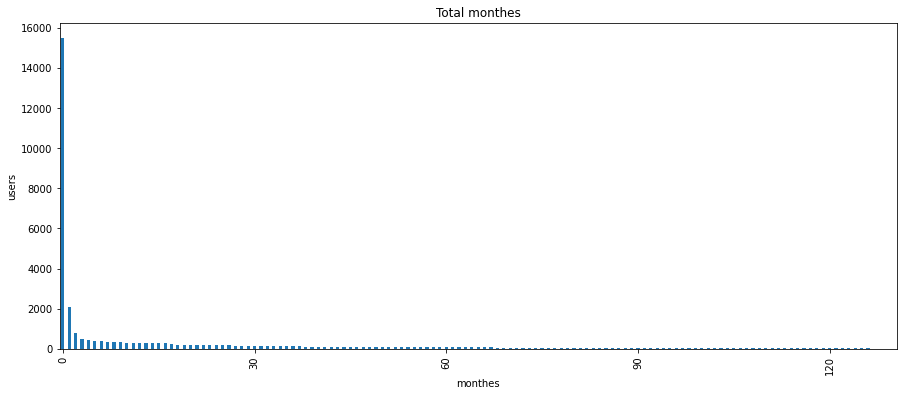

In [10]:
user['period'].value_counts().plot(kind = 'bar', figsize = (15,6))
plt.xticks(range(min(user['period']),max(user['period']),30),labels=[x for x in range(min(user['period']),max(user['period']),30)])
plt.xlabel('monthes')
plt.ylabel('users')
plt.title('Total monthes')

In [17]:
cnt=0
bad_user=list()
for i in range(len(user)):
    if user.loc[i,'period_year']==0 and user.loc[i,'period_month']==0 and user.loc[i,'period_day']==0:
        bad_user.append(user.loc[i,'user'])
        cnt+=1
print(cnt)
# print(bad_user)
print(len(bad_user))

10097
10097
